# ３章　データの可視化

- データの探索に必要なスキル・本書の可視化を作るスキルに絞って解説されている
- 何が可視化の良し悪しを分けるのかについての考え方が解説されている、とのこと

## 3.1 matplotlib

- 可視化ツールは数多く存在する（Seaborn, plotly, python版ggplotなど）
- matplotlibはインタラクティブな可視化に向いたライブラリでは無い
- しかし、長年使われている上、簡単な棒グラフや折れ線グラフ、散布図などには非常にうまく働く
- matplotlibaはPythonの標準ライブラリでは無いため、pip install matplotlibする必要が本来あるけど、**jupyterを使っているならおそらく一緒にインストールされているはず**
- pyplotモジュールによって状態を管理できるため、表示を段階的に組み上げることができる
- 完成したグラフはsavefig()関数を使ってファイルに保存したり、show()関数で表示できる
- pyplotの機能はいろいろ豊富なのだが、本書ではチャート生成関連の関数はplt.bar, plt.plot, plt.scatterしか扱っていない。より詳しく知りたい場合[matplotlib.pyplot](https://matplotlib.org/api/pyplot_summary.html)を見ると良い

### line chartの描画

[matplotlib.pyplot: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html)

- plt.plot(\*args[,scalex, scaley, data])はx, yのlineとmarkerを描画するfunction

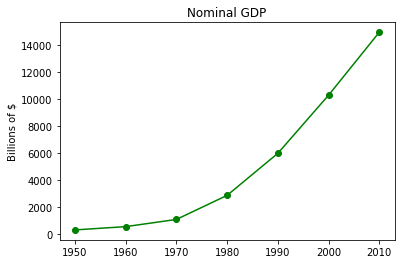

In [2]:
from matplotlib import pyplot as plt

years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

# x軸、y軸のデータを定義してチャート描画
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')

# タイトル追加
plt.title("Nominal GDP")

# Y軸にラベルを追加
plt.ylabel("Billions of $")
plt.show()

## 3.2 棒グラフ （Barchart）

- （データは離散型か連続型に分類でき、値が飛び飛びになる得るデータを離散型という）
- 棒グラフは離散的な項目が持つ量の違いを可視化する良い手段
- 棒グラフはデータの集まりごとの分布を視覚的に把握するヒストグラムにも適している
- Y軸の範囲を0から始めていない形式のグラフは誤った印象を与えてしまう可能性が高い。plt.axosは慎重に扱う。


### Barchartの描画

- plt.bar(x, height[, width, bottom, align, data]) でbar plotを描画する

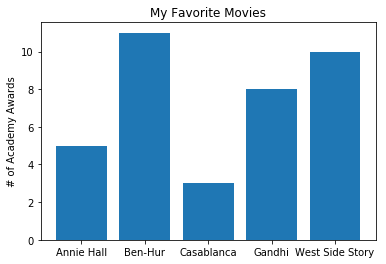

In [36]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

# x座標に５つのカテゴリで高さnum_oscarsのBarchart(棒グラフ)をプロット
plt.bar(range(len(movies)), num_oscars)

plt.title("My Favorite Movies")
plt.ylabel("# of Academy Awards")

plt.xticks(range(len(movies)), movies)

plt.show()

In [37]:
# ヒストグラムではデータをグループ化して描画するためCounterをimportする
from collections import Counter
grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]

histogram = Counter(min(grade // 10 * 10, 90) for grade in grades)
# /は除算、//は切り捨ての除算(floor division)
# grade // 10 * 10で一の位を0にし、min()で９０を超えた点（この場合100しか無いが）が現れた場合90を返すようにしている

histogram

Counter({80: 4, 90: 3, 70: 3, 0: 2, 60: 1})

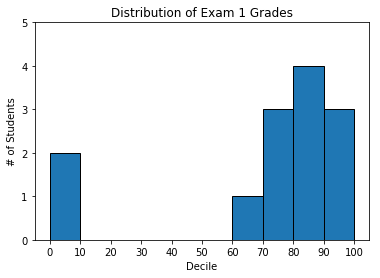

In [17]:
# keys()で切り捨てたビンの[80, 90, 70,,]を取得
# values()でカウント[4, 3, 3, 2, 1]を取得
plt.bar([x  + 5 for x in histogram.keys()], # barの幅とxtickの間隔を合わせるため5追加。何もしないとbarの中心がグループの始点になってしまう
       histogram.values(),
       10,  # barのwidthを10とする(グループのレンジの単位と合わせているはず)
       edgecolor=(0,0,0))

# x軸の範囲を-5から１０５、y軸の範囲を0,5とする
plt.axis([-5, 105, 0, 5])

plt.xticks([10 * i for i  in range(11)])  # 0,10, 20, 30,,100まで10刻みのxticksに定義
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()

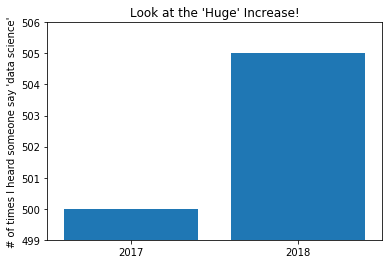

In [38]:
# 誤った印象を与えるY軸のグラフ

mentions = [500, 505]
years = [2017, 2018]

plt.bar(years, mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")

plt.ticklabel_format(useOffset=False)  # 無くても表示が変わらないのでは？？

plt.axis([2016.5, 2018.5, 499, 506])
plt.title("Look at the 'Huge' Increase!") 
plt.show()

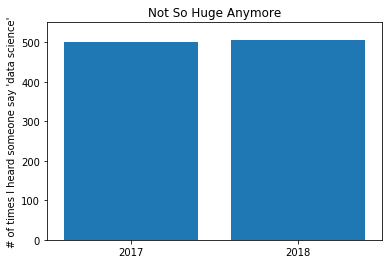

In [27]:
# 誤った印象を与えないY軸のグラフ　（それほど増えていないという直感を与えるチャートがこの場合適切）
plt.bar(years, mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")

plt.ticklabel_format(useOffset=False)
plt.axis([2016.5, 2018.5, 0, 550])
plt.title("Not So Huge Anymore") 
plt.show()

## 3.3 折れ線グラフ（line chart）

- line chartはplt.plotを使って描くことができる
- line chartは値の動きを見るのに適している
- plt.plotを複数回呼び出して１つのチャートに複数の線を描画することができる


Text(0.5,1,'Ther Bias-Vriance Tradeoff')

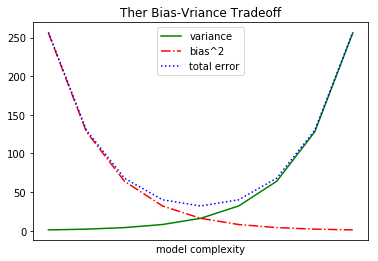

In [4]:
# bias-variance tradeoff
variance = [1, 2, 4, 8, 16, 32, 64, 128, 256] # 分散
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1] # 偏りの二乗
total_error = [x + y for x, y in zip(variance, bias_squared)] 
xs = [i for i, _ in enumerate(variance)] # indexのリスト取得

plt.plot(xs, variance, 'g-', label='variance')
plt.plot(xs, bias_squared, 'r-.', label='bias^2')
plt.plot(xs, total_error, 'b:', label='total error')

plt.legend(loc=9) # 凡例を自動描画。loc=9は凡例の位置
plt.xlabel("model complexity")
plt.xticks([])
plt.title("Ther Bias-Vriance Tradeoff")

## 3.4 散布図（Scatter plot）

- 散布図は２つのデータの関係を可視化するのに適している

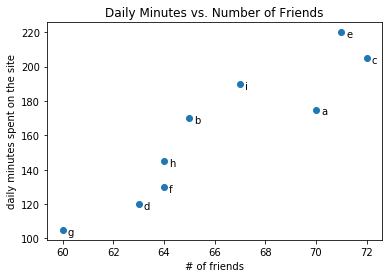

In [40]:
# ユーザの友達の数と1日あたりのサイトを使う時間

friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130,105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
plt.scatter(friends, minutes)
          
# 各点のラベル
for label, friend_count, minute_count in zip(labels, friends, minutes): 
    # plt.annotateはポイントxyにtextのアノテーションを付加する
    # plt.annotate(text, xy:tuple, *args, *kwargs)
    plt.annotat(label,e
                 xy=(friend_count, minute_count), 
                 xytext=(5, -5), textcoords='offset points')

plt.title("Daily Minutes vs. Number of Friends") 
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site") 
plt.show()

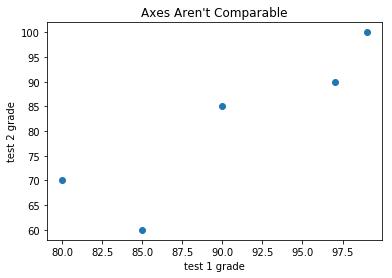

In [42]:
# 同じ試験の成績のデータをx,y軸にとった場合でもうまく比較できない場合がある
# この散布図の場合x,yのスケール（描画の上での単位長）が大きく異なっている

test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]
plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable") 
plt.xlabel("test 1 grade") 
plt.ylabel("test 2 grade") 

plt.show()

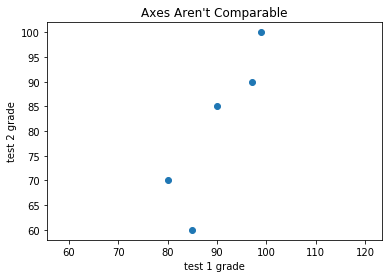

In [43]:
# plt.axis("equal")の呼び出しを加えることで上の散布図の値の変化（の量？）をより正確に表現できる

plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable") 
plt.xlabel("test 1 grade") 
plt.ylabel("test 2 grade") 
plt.axis("equal")
plt.show()

## Appendix: matplotlibでirisデータをプロットしてみる

- 本章の実践編として機械学習で誰もが？最初にサンプルとして使うUCIのirisデータを**取得&整形**して**プロット**してみます
- あやめの種類ごと、がくの長さとがくの幅の散布図、余裕があればsubplots（もしくはseabornのpair plot）を描く（pair plotはseabornを使ってOK）
- DLしたデータの各フィールドは、がく片長(Sepal Length), がく片幅(Sepal Width),花びら長(Petal Length),花びら幅(Petal Width),種(Species: あやめの種類)です
- irisデータの取得方法は色々あるのですが（そもそもscikit-learnやseabornのサンプルデータに含まれているはず）、ここでは本家のUCIからダウンロードして利用します
- pandasやnumpyを利用する方が簡単だと思いますが、（ゼロからという本書の趣旨通り）可能であればpandas等を使わずにデータを整形＆描画してみます


#### Appendix A: irisデータを取得する（取得後ローカルに保存 あるいは保存しないで使う）

In [1]:
# iris.csvの取得と保存
# 例えばiris.csvを保存したい場合
import csv
import requests

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
res = requests.get(url)

with open('iris.csv', 'w') as f:
    writer = csv.writer(f)
    for line in res.iter_lines():
        writer.writerow(line.decode('utf-8').split(','))

In [5]:
# 保存したiris.csvを読み込んで二次元のリストに変換する

import csv
with open('iris.csv') as f:
    iris_csv = csv.reader(f)
    iris_data = list(iris_csv)

- jupyterを使うならファイルにデータを保存することなく読み込んだデータを何度も描画に利用できる（オブジェクトが保持されるので）ので下の方法でも良いかもしれません
- しかしnotebookを開く度に保存先を叩いてしまうので、上のようにローカルにCSVファイルを保存する方が、描画テストのコードにはより向いていると思います

In [37]:
import csv
import requests

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
res = requests.get(url)
iris_data = []
for line in res.iter_lines():
    iris_data.append(line.decode('utf-8').split(','))

#### Appendix B: とりあえず取得したirisデータセットで散布図を描いてみる

In [7]:
iris_data

[['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'],
 ['4.9', '3.0', '1.4', '0.2', 'Iris-setosa'],
 ['4.7', '3.2', '1.3', '0.2', 'Iris-setosa'],
 ['4.6', '3.1', '1.5', '0.2', 'Iris-setosa'],
 ['5.0', '3.6', '1.4', '0.2', 'Iris-setosa'],
 ['5.4', '3.9', '1.7', '0.4', 'Iris-setosa'],
 ['4.6', '3.4', '1.4', '0.3', 'Iris-setosa'],
 ['5.0', '3.4', '1.5', '0.2', 'Iris-setosa'],
 ['4.4', '2.9', '1.4', '0.2', 'Iris-setosa'],
 ['4.9', '3.1', '1.5', '0.1', 'Iris-setosa'],
 ['5.4', '3.7', '1.5', '0.2', 'Iris-setosa'],
 ['4.8', '3.4', '1.6', '0.2', 'Iris-setosa'],
 ['4.8', '3.0', '1.4', '0.1', 'Iris-setosa'],
 ['4.3', '3.0', '1.1', '0.1', 'Iris-setosa'],
 ['5.8', '4.0', '1.2', '0.2', 'Iris-setosa'],
 ['5.7', '4.4', '1.5', '0.4', 'Iris-setosa'],
 ['5.4', '3.9', '1.3', '0.4', 'Iris-setosa'],
 ['5.1', '3.5', '1.4', '0.3', 'Iris-setosa'],
 ['5.7', '3.8', '1.7', '0.3', 'Iris-setosa'],
 ['5.1', '3.8', '1.5', '0.3', 'Iris-setosa'],
 ['5.4', '3.4', '1.7', '0.2', 'Iris-setosa'],
 ['5.1', '3.7', '1.5', '0.4', 'Iri

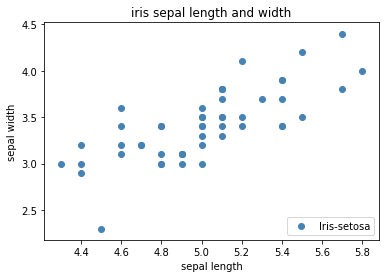

In [14]:
from matplotlib import pyplot as plt

iris_data.pop()

# irisの各データは文字列として格納されているので数値に型を変更してからプロットしている
sepal_setosa_l = [float(row[0]) for  row in iris_data if row[4] == 'Iris-setosa']
sepal_setosa_w = [float(row[1]) for  row in iris_data if row[4] == 'Iris-setosa']

plt.scatter(sepal_setosa_l, sepal_setosa_w, label='Iris-setosa', color='steelblue')
plt.title('iris sepal length and width')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(loc='lower right')
plt.show()

#### Appendix C: 種に分けて散布図にプロットする

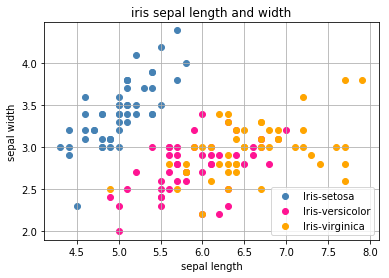

In [15]:
# あやめ3種をプロットする場合単純に上の操作を３種類分繰り返してもOKなのだけど、
# データの分類がさらに多かった場合のことを考えると、同じことを繰り返し記述するのは良い方法ではないので、、、

iris_species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['steelblue', 'deeppink', 'orange']

for s, c in zip(iris_species, colors):
    l = [float(row[0]) for  row in iris_data if row[4] == s]
    w = [float(row[1]) for  row in iris_data if row[4] == s]
    plt.scatter(l, w, label=s, color=c)

plt.title('iris sepal length and width')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(loc='lower right')
plt.axis('equal')
plt.grid(True)
plt.show()

#### Appendix D: データセット全体を散布図としてsubplotsする

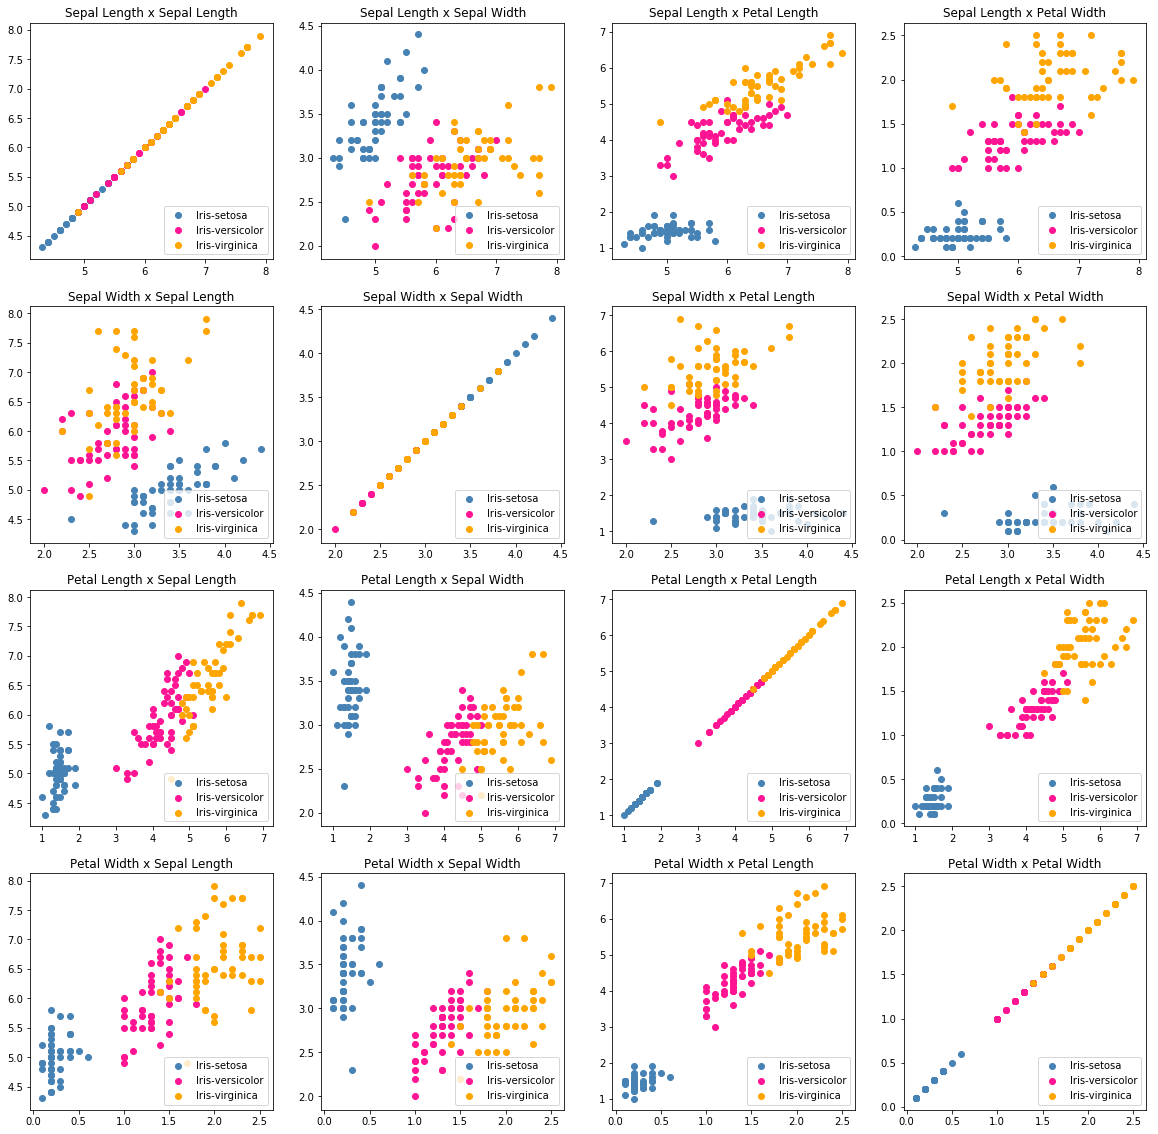

In [35]:
fig, axs = plt.subplots(4, 4)
fig.set_figheight(20)
fig.set_figwidth(20)
fields = ["Sepal Length", "Sepal Width","Petal Length","Petal Width"]

# ４つの特徴量を総当たりにする4 x 4の散布図のsubplotsを描画する
for i in range(4):
    for j in range(4):
        # 上の散布図と同じ処理をsubplotsの各コマ分繰り返す
        for s, c in zip(iris_species, colors):
            l = [float(row[i]) for  row in iris_data if row[4] == s]
            w = [float(row[j]) for  row in iris_data if row[4] == s]
            axs[i][j].scatter(l, w, label=s, color=c)
        axs[i,j].legend(loc='lower right')
        axs[i,j].set_title(fields[i] + " x " + fields[j])

#### Seabornを使うと、、

/Users/oec/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


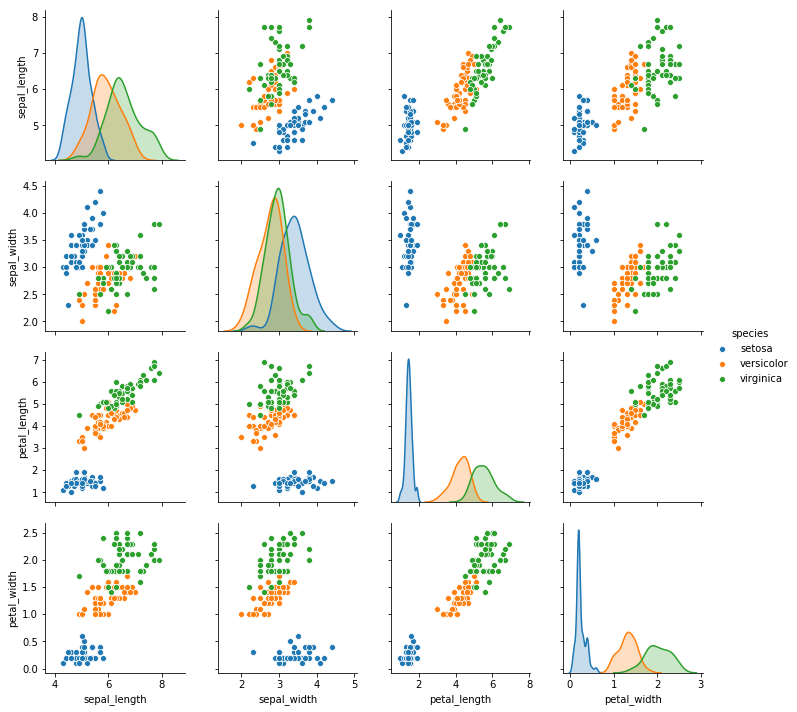

In [16]:
import seaborn as sns
# seabornはsampleデータとしてデータフレームでirisデータセットを持っている
# 以下参考まで
iris = sns.load_dataset("iris")
g =  sns.pairplot(iris, hue="species") # 色分けするカラムを指定。speciesがnumericなデータで無いことに留意